In [1]:
# ================================
# Dynamic Pricing Algorithms
# Vaishali Magar
# ================================

# 1. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 2. Load Data
df = pd.read_csv(r"C:\Users\Vaishali Magar\Cleaned_Classes_April_June_2018.csv")

In [4]:
df["BookingStartTime"] = pd.to_datetime(df["BookingStartTime"], format="%d-%m-%Y", errors="coerce")
df["hour"] = df["BookingStartTime"].dt.hour
df["day_of_week"] = df["BookingStartTime"].dt.day_name()


In [5]:
# 3. Define Rules
def apply_dynamic_pricing(row):
    price = row["Price_INR"]
    utilization = row["Number_Booked"] / row["MaxBookees"] if row["MaxBookees"] > 0 else 0
    
    # Rule 1: Peak hours (6-9am, 5-8pm) → increase price 20%
    if row["hour"] in range(6,10) or row["hour"] in range(17,21):
        price *= 1.2
    
    # Rule 2: High utilization (>80%) → increase price 15%
    if utilization > 0.8:
        price *= 1.15
    
    # Rule 3: Low utilization (<30%) → discount 20%
    elif utilization < 0.3:
        price *= 0.8
    
    # Rule 4: Weekend premium (Saturday/Sunday) → increase price 10%
    if row["day_of_week"] in ["Saturday", "Sunday"]:
        price *= 1.1
    
    return round(price, 2)

In [6]:
# 4. Apply Rules
df["DynamicPrice"] = df.apply(apply_dynamic_pricing, axis=1)


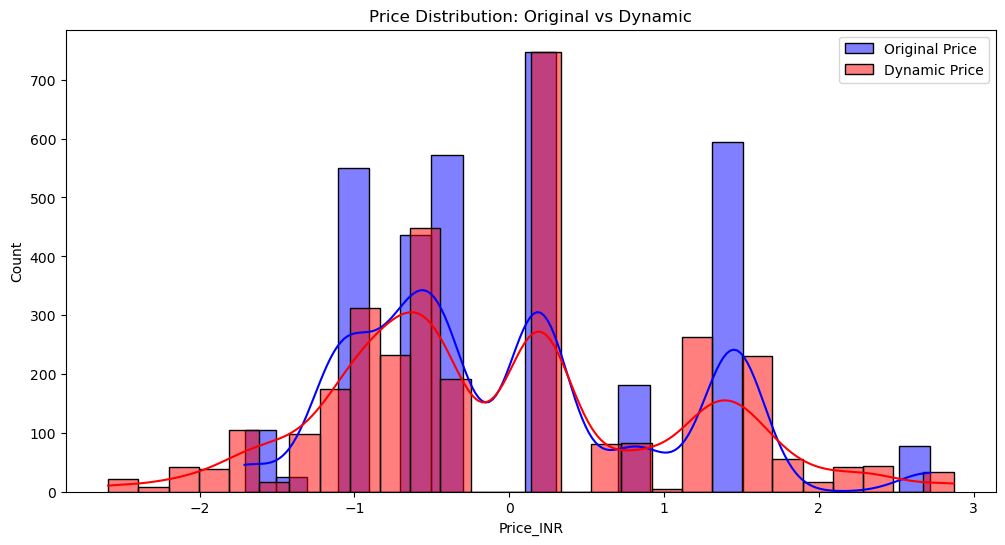

In [7]:
# 5. Compare Before vs After
plt.figure(figsize=(12,6))
sns.histplot(df["Price_INR"], color="blue", label="Original Price", kde=True)
sns.histplot(df["DynamicPrice"], color="red", label="Dynamic Price", kde=True)
plt.legend()
plt.title("Price Distribution: Original vs Dynamic")
plt.show()

In [8]:
# 6. Sample Output
print(df[["ActivityDescription","BookingStartTime","MaxBookees","Number_Booked","Price_INR","DynamicPrice"]].head(10))

print("✅ Dynamic Pricing Applied Successfully")


       ActivityDescription    BookingStartTime  MaxBookees  Number_Booked  \
0  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -0.535512   
1  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -0.219810   
2  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -0.325044   
3  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -0.851213   
4  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -1.061680   
5  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -0.745979   
6  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -1.061680   
7  20-20-20  2.45pm-3.45pm 2025-09-13 14:45:00   -0.475775      -1.482615   
8     20-20-20 7.00-8.00pm 2025-09-13 19:00:00   -0.542045      -0.745979   
9     20-20-20 7.00-8.00pm 2025-09-13 19:00:00   -0.542045      -0.535512   

   Price_INR  DynamicPrice  
0  -1.709436         -1.50  
1  -1.709436         -1.50  
2  -1.709436         -1.50  
3  -1.709436         -1.50  
4  -1.7